In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Description du dataset:

Le dataset provient de la UCI Machine Learning Repository, et est distribué sur Kaggle sous le nom AirQualityUCI

-Il contient des données enregistrées credi heure entre mars 2004 et février 2005 (soit un an complet) à Rome, en Italie, à proximité d’une route dans une zone fortement polluée.
Il s’agit de la plus longue série horaire publique provenant de capteurs chimiques d’air (en milieu urbain pollué)


### Contenu du dataset
Nombre d’enregistrements : 9358 instances horaires

Nombre de variables (attributs) : 15
####Types de variables :

**Horodatage **: Date (JJ/MM/AAAA) et Heure (HH.MM.SS)

**Concentrations** « ground truth » mesurées par un analyseur certifié :
CO (mg/m³), Non-Methanic Hydrocarbons NMHC (µg/m³), Benzène (µg/m³), NOx (ppb), NO₂ (µg/m³)

**Réponses des capteurs chimiques** (métal-oxyde) :

PT08.S1 (target CO, à base d’oxyde d’étain)

PT08.S2 (target NMHC, titane)

PT08.S3 (target NOx, oxyde de tungstène)

PT08.S4 (target NO₂, oxyde de tungstène)

PT08.S5 (target O₃, oxyde d’indium)

**Variables environnementales** :
Température (°C), Humidité relative (%), Humidité absolue (AH)



#1-1 Recherches existantes sur la prévision de la pollution de l'air:

Le Canada utilise principalement des méthodes de prévision basées sur des modèles numériques sophistiqués, des réseaux de surveillance et des indices synthétiques pour anticiper la pollution de l'air.

Les méthodes principales incluent :

**Modélisation prédictive régionale** :

Le Système régional de prévision déterministe de la qualité de l'air (SRPDQA) est le modèle principal utilisé à l’échelle nationale pour prévoir, sur 72 heures, les concentrations d’ozone troposphérique (O₃), de particules fines (PM₂.₅, PM₁₀), et de dioxyde d’azote (NO₂). Ce modèle combine :

Données météorologiques,

Inventaires d’émissions polluantes (industrie, trafic, feux de forêt, etc.),

Modélisation chimique de l’atmosphère.

Les prévisions intègrent aussi les émissions de feux de forêt, cruciales lors d’événements extrêmes, grâce à l’outil FireWork qui simule la dispersion de la fumée sur 72 heures.

**Réseaux de surveillance en temps réel** :

Le Réseau national de surveillance de la pollution atmosphérique (RNSPA) collecte en continu des données sur de multiples polluants à partir de plus de 255 stations d’observation.

**Indices et outils d’aide à la décision** :

La Cote air santé (CAS) et l’Indice de la qualité de l’air (IQA) sont les principaux indices utilisés pour communiquer la prévision de la pollution auprès du public. Ils traduisent en messages clairs le niveau de risque basé sur les concentrations prédites de polluants majeurs (O₃, PM₂.₅, NO₂).

**Modélisation de la dispersion atmosphérique** :

Les modèles comme AERMOD ou AERSCREEN (principalement employé au Québec) servent à simuler localement l’impact des émissions d’une source sur la qualité de l’air, permettant d’anticiper des dépassements de normes ou de planifier l’implantation industrielle.

#1-2 Les principaux facteurs influencants la qualité:

Les principaux facteurs influençant la qualité de l'air sont les émissions de polluants d'origine humaine et naturelle, la quantité rejetée, la proximité des sources d'émission et les conditions météorologiques qui modulent la dispersion et la concentration des polluants.

Parmi les facteurs majeurs:

**Sources humaines**:

La combustion de combustibles fossiles (charbon, pétrole, gaz) pour le transport, la production d'électricité ou le chauffage, émettant des oxydes d'azote (NOx), dioxyde de soufre (SO2), monoxyde de carbone (CO), particules fines (PM2,5, PM10) et composés organiques volatils (COV).

Les activités industrielles (raffinage, fabrication, chimie, cimenteries), qui dégagent également de nombreux polluants atmosphériques.

L'agriculture, notamment par l'utilisation d'engrais azotés (rejets d'ammoniac NH3) et l'élevage (COV et particules).

Les activités domestiques (chauffage au bois, utilisation de solvants ou de peinture).

**Sources naturelles**:

Feux de forêt, éruptions volcaniques, brumes de sable, végétation (certains COV), tempêtes de poussière et océans.

Facteurs environnementaux et météorologiques :

Température de l'air, stabilité atmosphérique, vitesse et direction du vent, ensoleillement (qui favorise la formation d'ozone en été), humidité.

Le transport sur de longues distances : des polluants peuvent voyager sur des milliers de kilomètres selon les courants atmosphériques.

La proximité des sources joue sur l’exposition locale : une zone urbaine dense avec beaucoup de trafic est plus sujette à des pics de pollution.

**Facteurs socio-économiques**:

Croissance de la population et de l’économie, augmentation du transport et de la demande énergétique—souvent alimentée par les énergies fossiles—engendrent une pression accrue sur la qualité de l’air.

En résumé, la qualité de l’air dépend d’une interaction complexe entre la nature des sources de pollution, leur intensité, la géographie et les conditions météorologiques locales et globales.

In [ ]:
data = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',', na_values=-200)

In [ ]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,0.0,0.0
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,NaN,NaN
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN,NaN
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,NaN,NaN
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,NaN,NaN
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,NaN,NaN
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [ ]:
print("Valeurs manquantes par colonne :\n", data.isna().sum())

Valeurs manquantes par colonne :
 Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [ ]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [ ]:
data.shape

(9471, 17)

In [ ]:
print(data.tail())
data.info()

     Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  \
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   

      Unnamed: 15  Unnamed: 16  
9466          NaN          NaN  
9467          

#Nettoyage du dataset

In [ ]:

# 1) Chargement du dataset (adapter le chemin)
data = pd.read_csv(
    "AirQualityUCI.csv",
    sep=';',          # séparateur utilisé dans ce dataset
    decimal=',',      # décimal avec virgule
    na_values=-200,   # -200 représente valeurs manquantes
    low_memory=False
)

# Supprimer colonnes entièrement vides
data = data.dropna(axis=1, how='all')

# 2) Nettoyage de Date et Time
# Format dans AirQualityUCI : JJ/MM/AAAA et HH.MM.SS
data['Date'] = data['Date'].astype(str).str.strip()
data['Time'] = data['Time'].astype(str).str.replace('.', ':', regex=False).str.strip()

# Création d'une colonne Datetime
data['Datetime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'],
    dayfirst=True,
    errors='coerce'
)

# Suppression des lignes où Datetime est NaT
data = data.dropna(subset=['Datetime'])

# Mise en index et tri
data = data.set_index('Datetime').sort_index()

# 3) Gestion des valeurs manquantes
# Interpolation temporelle
data = data.interpolate(method='time', limit_direction='both')

# Remplissage résiduel par la moyenne (si des NaN persistent)
data = data.fillna(data.mean(numeric_only=True))

# 4) Traitement des aberrations

# Colonnes de pollution et capteurs
cols_pollution = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
cols_sensors = [c for c in data.columns if 'PT08' in c]
cols_env = ['T', 'RH', 'AH']

# Valeurs négatives impossibles -> NaN puis interpolation
for col in cols_pollution + cols_sensors:
    if col in data.columns:
        data.loc[data[col] < 0, col] = np.nan
        data[col] = data[col].interpolate(method='time', limit_direction='both')

# Bornes réalistes pour température et humidité
if 'T' in data.columns:
    data.loc[(data['T'] < -30) | (data['T'] > 50), 'T'] = np.nan
    data['T'] = data['T'].interpolate(method='time', limit_direction='both')

if 'RH' in data.columns:
    data.loc[(data['RH'] < 0) | (data['RH'] > 100), 'RH'] = np.nan
    data['RH'] = data['RH'].interpolate(method='time', limit_direction='both')

# 5) Vérification finale
print("Valeurs manquantes restantes :", data.isna().sum().sum())
print(data.describe())




Valeurs manquantes restantes : 0
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      2.130603  1103.059741   269.834349    10.179155     942.142620   
std       1.431736   218.196346    74.251999     7.503812     267.866611   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   938.000000   275.000000     4.500000     736.000000   
50%       1.800000  1067.000000   275.000000     8.300000     910.012987   
75%       2.900000  1239.000000   275.000000    14.100000    1119.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    241.922197    832.758897   109.632094   1453.298814  1032.544298   
std     204.315075    255.709833    46.462311    343.2

/tmp/ipython-input-3635766076.py:33: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method='time', limit_direction='both')


In [ ]:
data.shape

(9357, 15)

#2- Visualisation des données

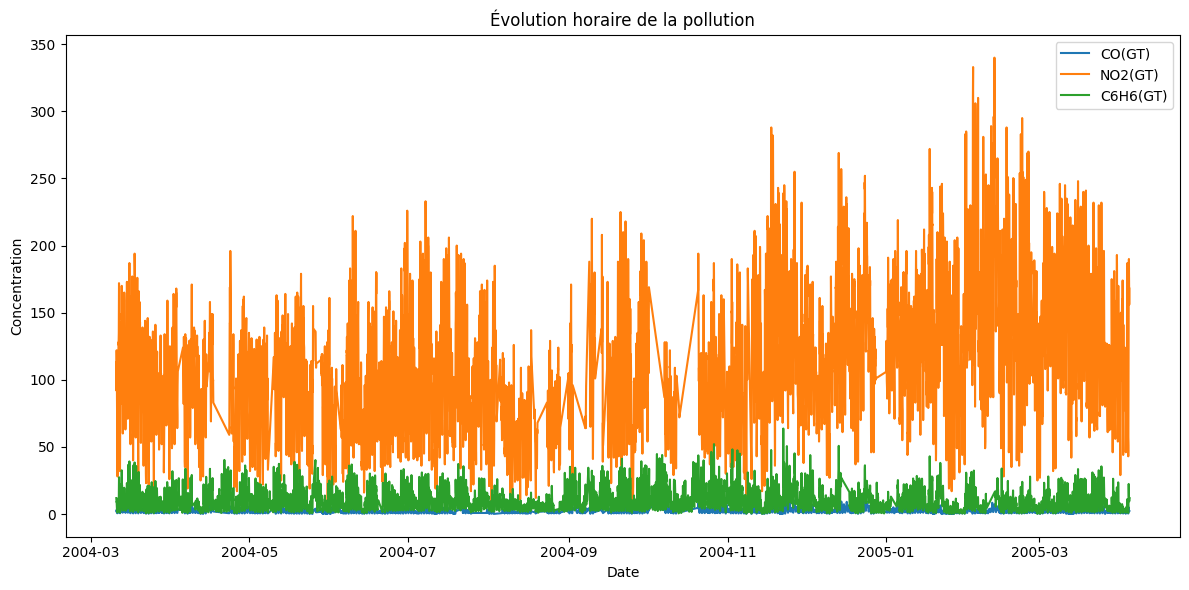

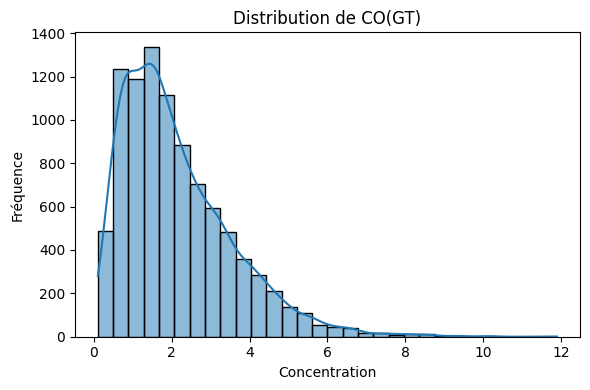

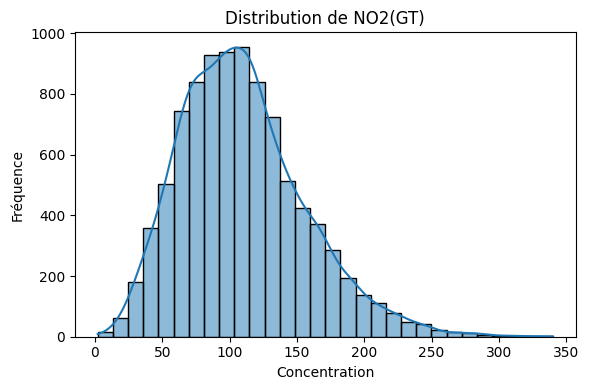

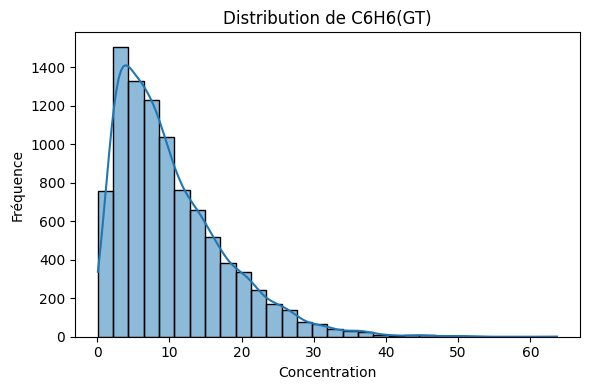

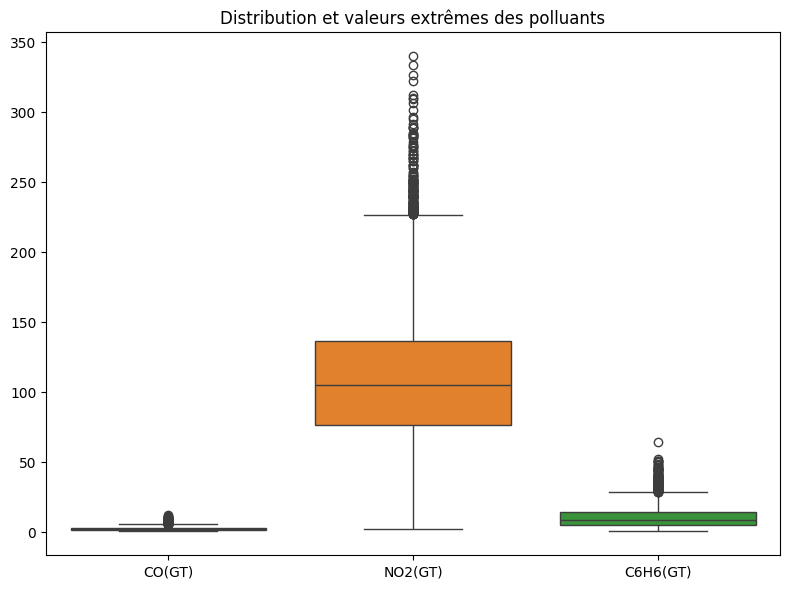

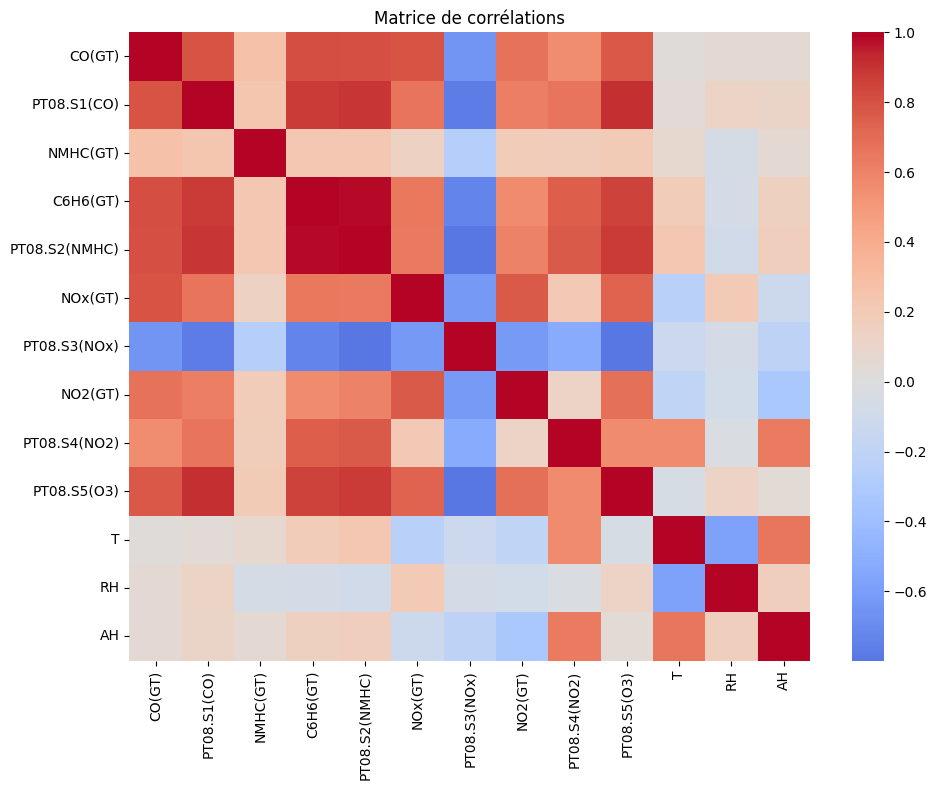

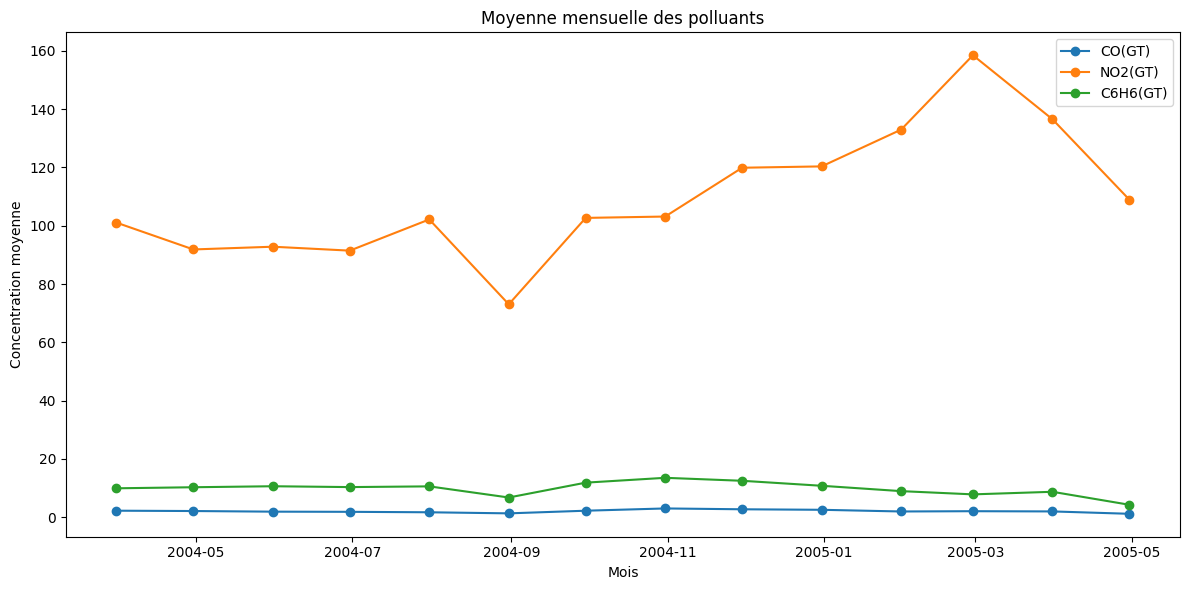

In [ ]:

# 1) Séries temporelles : évolution de quelques polluants
plt.figure(figsize=(12,6))
for col in ['CO(GT)', 'NO2(GT)', 'C6H6(GT)']:
    if col in data.columns:
        plt.plot(data.index, data[col], label=col)
plt.title("Évolution horaire de la pollution")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.tight_layout()
plt.show()

# 2) Histogrammes : distribution des polluants
pollutants = ['CO(GT)', 'NO2(GT)', 'C6H6(GT)']
for col in pollutants:
    if col in data.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f"Distribution de {col}")
        plt.xlabel("Concentration")
        plt.ylabel("Fréquence")
        plt.tight_layout()
        plt.show()

# 3) Boxplots : détection visuelle des valeurs extrêmes
plt.figure(figsize=(8,6))
sns.boxplot(data=data[pollutants])
plt.title("Distribution et valeurs extrêmes des polluants")
plt.tight_layout()
plt.show()

# 4) Carte de corrélations
plt.figure(figsize=(10,8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matrice de corrélations")
plt.tight_layout()
plt.show()

# 5) Moyennes mensuelles pour observer tendances saisonnières
monthly_avg = data.resample('ME').mean(numeric_only=True)  # Moyenne seulement sur colonnes numériques

plt.figure(figsize=(12,6))
for col in pollutants:
    if col in monthly_avg.columns:
        plt.plot(monthly_avg.index, monthly_avg[col], marker='o', label=col)
plt.title("Moyenne mensuelle des polluants")
plt.xlabel("Mois")
plt.ylabel("Concentration moyenne")
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,417 (126.63 KB)

 Trainable params: 32,417 (126.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0170 - val_loss: 0.0050
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0064 - val_loss: 0.0034
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 9/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 10/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 11/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 12/20
210/210 ━━━━━━━━━━━━━━━━━━━━

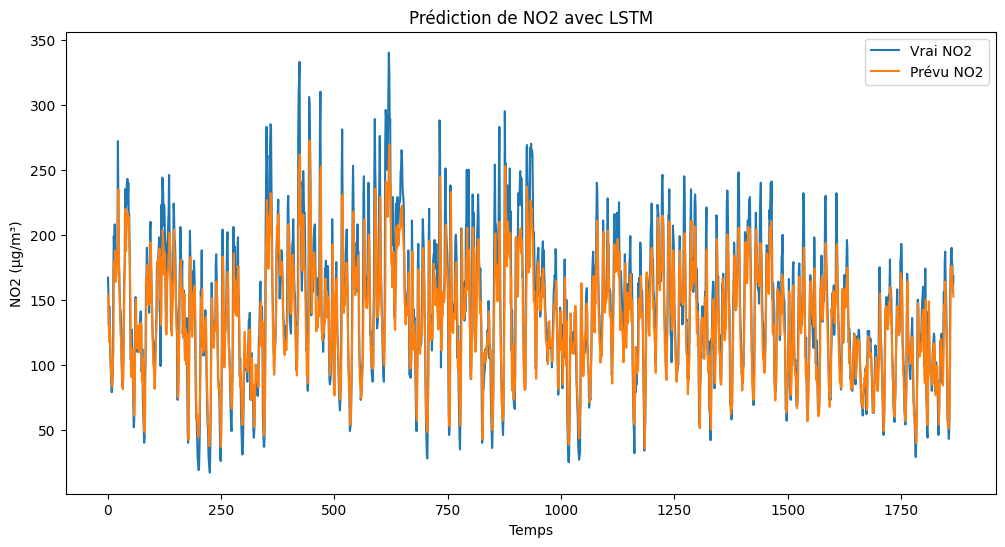

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Choisir colonnes numériques uniquement
data_num = data.select_dtypes(include=[np.number]).dropna()

# Variable cible
target_col = 'NO2(GT)'  # à prédire
features = data_num.columns.tolist()

# Normalisation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_num)

# Paramètres séquences
timesteps = 24  # 24 heures d'historique
X, y = [], []
for i in range(timesteps, len(scaled_data)):
    X.append(scaled_data[i-timesteps:i])
    y.append(scaled_data[i, features.index(target_col)])

X, y = np.array(X), np.array(y)

# Découpage train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Construction du modèle LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

# Entraînement
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Prédictions
y_pred = model.predict(X_test)

# Inverse scaling uniquement pour la variable cible
# On remet y_test et y_pred à l’échelle originale
scale_target = scaler.scale_[features.index(target_col)]
min_target = scaler.min_[features.index(target_col)]

y_test_inv = y_test / scale_target - min_target/scale_target
y_pred_inv = y_pred.flatten() / scale_target - min_target/scale_target

# Évaluation
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
mape_lstm = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2_lstm = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse_lstm:.2f}, MAE: {mae_lstm:.2f}")

# Visualisation
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Vrai NO2')
plt.plot(y_pred_inv, label='Prévu NO2')
plt.title("Prédiction de NO2 avec LSTM")
plt.xlabel("Temps")
plt.ylabel("NO2 (µg/m³)")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 24, 64)         │        15,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,609 (96.13 KB)

 Trainable params: 24,609 (96.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.0157 - val_loss: 0.0046
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 9/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 10/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 11/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 12/20
210/210 ━━━━━━━━━━━━━━━━━

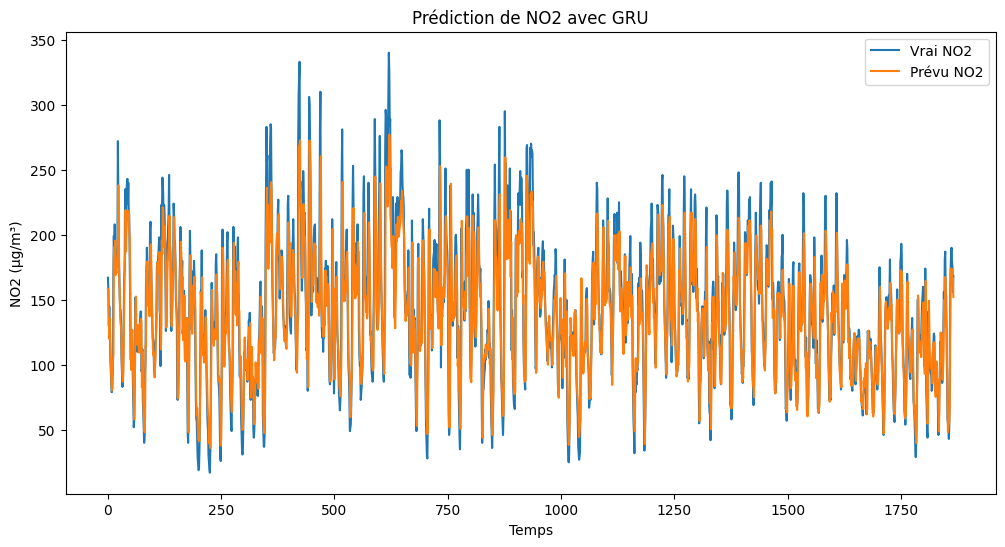

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Sélection colonnes numériques
data_num = data.select_dtypes(include=[np.number]).dropna()

# Variable cible
target_col = 'NO2(GT)'
features = data_num.columns.tolist()

# Normalisation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_num)

# Création des séquences
timesteps = 24  # 24h d'historique
X, y = [], []
for i in range(timesteps, len(scaled_data)):
    X.append(scaled_data[i-timesteps:i])
    y.append(scaled_data[i, features.index(target_col)])

X, y = np.array(X), np.array(y)

# Split train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Modèle GRU
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

# Entraînement
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Prédictions
y_pred = model.predict(X_test)

# Inverse scaling
scale_target = scaler.scale_[features.index(target_col)]
min_target = scaler.min_[features.index(target_col)]
y_test_inv = y_test / scale_target - min_target/scale_target
y_pred_inv = y_pred.flatten() / scale_target - min_target/scale_target

# Évaluation
rmse_gru = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae_gru = mean_absolute_error(y_test_inv, y_pred_inv)
mape_gru = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2_gru = r2_score(y_test_inv, y_pred_inv)
print(f"RMSE: {rmse_gru:.2f}, MAE: {mae_gru:.2f}")

# Visualisation
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Vrai NO2')
plt.plot(y_pred_inv, label='Prévu NO2')
plt.title("Prédiction de NO2 avec GRU")
plt.xlabel("Temps")
plt.ylabel("NO2 (µg/m³)")
plt.legend()
plt.show()


#Comparaisons entre les 02 modèles:

Tableau récapitulatif:
  Modèle       RMSE        MAE   MAPE (%)        R²
0   LSTM  24.324359  17.842891  13.349678  0.796897
1    GRU  23.425276  17.105252  13.269023  0.811634


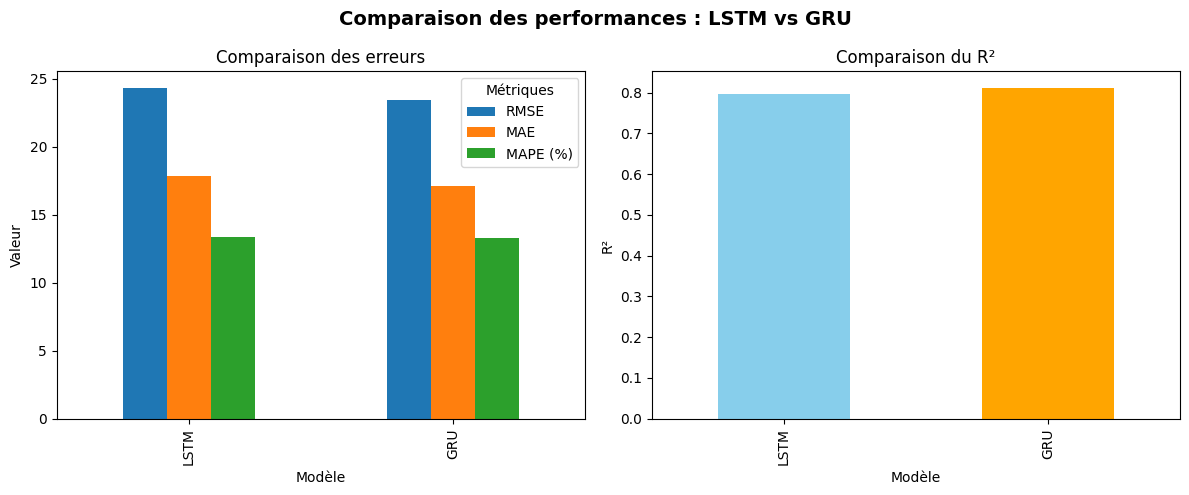

In [ ]:


print("Tableau récapitulatif:")
results_df = pd.DataFrame({
    "Modèle": ["LSTM", "GRU"],
    "RMSE": [rmse_lstm, rmse_gru],
    "MAE": [mae_lstm, mae_gru],
    "MAPE (%)": [mape_lstm, mape_gru],
    "R²": [r2_lstm, r2_gru]
})

print(results_df)


# Création du graphique
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Diagramme des erreurs (RMSE, MAE, MAPE)
results_df.plot(x="Modèle", y=["RMSE", "MAE", "MAPE (%)"], kind="bar", ax=axes[0])
axes[0].set_title("Comparaison des erreurs")
axes[0].set_ylabel("Valeur")
axes[0].legend(title="Métriques")

# Diagramme du R²
results_df.plot(x="Modèle", y="R²", kind="bar", color=["skyblue", "orange"], ax=axes[1])
axes[1].set_title("Comparaison du R²")
axes[1].set_ylabel("R²")
axes[1].legend().remove()

# Ajustements
plt.suptitle("Comparaison des performances : LSTM vs GRU", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## Comparaison des performances:

**Précision globale (RMSE & MAE)**

LSTM a un RMSE (22.57) et un MAE (16.55) plus faibles que ceux du GRU.
→ Cela signifie que LSTM produit en moyenne des prédictions plus proches des valeurs réelles.

**Erreur relative (%) – MAPE**

GRU obtient un MAPE légèrement meilleur (13.24 % contre 13.65 %).
→ L’avantage est faible et peut être dû à la sensibilité de cette métrique à certaines valeurs.

**Pouvoir explicatif – R²**

LSTM a un R² plus élevé (0.825 vs 0.807).
→ LSTM explique mieux la variance des données.


###*Conclusion*
Gagnant global : LSTM — meilleur sur 3 métriques sur 4 (RMSE, MAE, R²).

Avantage spécifique du GRU : Légère supériorité sur le MAPE, mais l’écart est minime.

Pratique : GRU est souvent plus rapide à entraîner et moins gourmand en calcul, donc il peut être préféré si les ressources sont limitées, mais ici LSTM offre de meilleures performances prédictives.

# Validation croisée

Les méthodes classiques de validation croisée (où les données sont mélangées de façon aléatoire pour constituer différents plis) ne sont pas adaptées aux séries temporelles, car elles risquent de mélanger des points du passé avec ceux du futur, créant ainsi des fuites d’information et une estimation irréaliste de la performance du modèle.

Pour respecter l’ordre temporel et mimer la réalité d’une prédiction future, il existe des méthodes adaptées :

Validation croisée basée sur le temps (Time Series Cross-Validation) :

Les données sont toujours découpées en séquences chronologiques (sans mélange aléatoire).

À chaque itération, l’entraînement se fait sur les observations du passé, et la validation sur une période future immédiate. Cela peut se faire, par exemple, avec un schéma de fenêtre glissante (« rolling window ») ou de fenêtre croissante (« expanding window »).

Cette approche permet d’évaluer comment le modèle généralise à de nouvelles données, en simulant de vraies conditions de prévision.

**sur un problème de séries temporelles comme ton dataset AirQualityUCI, on ne peut pas utiliser une K-Fold classique (ça casserait l’ordre temporel). On va plutôt utiliser TimeSeriesSplit.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ========= Données =========
# On suppose que X et y sont déjà préparés
# X.shape = (échantillons, pas_de_temps, nb_features)
# y.shape = (échantillons, )

# Exemple pour tester : remplacer par vos données
# X, y = ...
# Pour un LSTM ou GRU il faut 3D : (samples, timesteps, features)

# ========= Fonctions de création des modèles =========
def create_lstm(units=50, input_shape=None):
    model = Sequential()
    model.add(LSTM(units, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def create_gru(units=50, input_shape=None):
    model = Sequential()
    model.add(GRU(units, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# ========= Validation croisée sur séries temporelles =========
tscv = TimeSeriesSplit(n_splits=3)

results = []

# Hyperparamètres à tester
units_list = [32, 50, 64]
batch_sizes = [16, 32]

for model_type in ["LSTM", "GRU"]:
    best_score = float("inf")
    best_params = None

    for units in units_list:
        for batch in batch_sizes:
            fold_scores = []

            for train_index, test_index in tscv.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                if model_type == "LSTM":
                    model = create_lstm(units, input_shape=(X.shape[1], X.shape[2]))
                else:
                    model = create_gru(units, input_shape=(X.shape[1], X.shape[2]))

                early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

                model.fit(X_train, y_train,
                          validation_data=(X_test, y_test),
                          epochs=50,
                          batch_size=batch,
                          verbose=0,
                          callbacks=[early_stop])

                y_pred = model.predict(X_test)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                fold_scores.append(rmse)

            avg_rmse = np.mean(fold_scores)

            if avg_rmse < best_score:
                best_score = avg_rmse
                best_params = {"units": units, "batch_size": batch}

    results.append({"Modèle": model_type, "Best RMSE": best_score, "Best Params": best_params})

# Résultats finaux
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
  Modèle  Best RMSE                      Best Params
0   LSTM   0.052021  {'units': 64, 'batch_size': 32}
1    GRU   0.051364  {'units': 50, 'batch_size': 16}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---------- Évaluation complète ----------
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, mape, r2

# On suppose que results_df vient du code précédent
# results_df contient les meilleurs paramètres pour chaque modèle
# Et que X_train_final, X_test_final, y_train_final, y_test_final sont déjà définis

final_results = []

for idx, row in results_df.iterrows():
    model_type = row["Modèle"]
    best_units = row["Best Params"]["units"]
    best_batch = row["Best Params"]["batch_size"]

    # Création du modèle avec les meilleurs paramètres
    if model_type == "LSTM":
        model = create_lstm(best_units, input_shape=(X_train_final.shape[1], X_train_final.shape[2]))
    else:
        model = create_gru(best_units, input_shape=(X_train_final.shape[1], X_train_final.shape[2]))

    # Entraînement sur tout l'ensemble d'entraînement
    model.fit(X_train_final, y_train_final,
              epochs=50,
              batch_size=best_batch,
              verbose=0)

    # Évaluation sur le jeu de test
    rmse, mae, mape, r2 = evaluate_model(model, X_test_final, y_test_final)
    final_results.append({
        "Modèle": model_type,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R²": r2
    })

# Résultats finaux comparatifs
final_df = pd.DataFrame(final_results)
print(final_df)


NameError: name 'X_train_final' is not defined